In [1]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import sparse
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Importing the dataset and converting into 2x2 Matrix

users = pd.read_csv("users.csv")
unique_users = users['user_id'].unique()
unique_cuisine = users['cuisine'].unique()
print(unique_users)
print(unique_cuisine)
matrix_users = pd.DataFrame(index=unique_users,columns=unique_cuisine)
matrix_users = matrix_users.fillna(0)
matrix_users

['user0' 'user1' 'user2' ... 'user2997' 'user2998' 'user2999']
['Bilirazan' 'German' 'Lebanese' 'Maharashtrian' 'Zanzibari' 'Arab'
 'Bashkir' 'Georgian' 'Zambian' 'Pennsylvania Dutch' 'Russian'
 'Portuguese' 'Mediterranean cuisine' 'Buddhist' 'Peranakan' 'Jamaican'
 'Sri Lankan' 'Japanese' 'Texan' 'Soviet' 'Chechen' 'Laotian' 'Tatar'
 'Québécois' 'Mennonite' 'Estonian' 'Azerbaijani' 'Crimean Tatar'
 'Pakistani' 'Bengali' 'Assyrian' 'Caribbean' 'French' 'New Mexican'
 'Brazilian' 'Awadhi' 'Egyptian' 'Lithuanian' 'Czech' 'Native American'
 'Greek' 'Korean' 'Gujarati' 'Bulgarian' 'Chinese Islamic' 'Cypriot'
 'Odia' 'Malaysian Indian cuisine' 'Inuit' 'Balochi' 'Sami' 'Tamil'
 'Malay' 'Punjabi' 'South Indian' 'Nepalese' 'Danish' 'Andhra'
 'Mangalorean' 'Persian' 'Keralite' 'Ukrainian' 'Parsi'
 'Indian Singaporean cuisine' 'British' 'Filipino' 'Berber' 'Polish'
 'Udupi' 'Cantonese' 'Anglo-Indian' 'Irish' 'Italian cuisine'
 'Malaysian Chinese cuisine' 'Armenian' 'Taiwanese' 'Argentine' 'Roman

,Bilirazan,German,Lebanese,Maharashtrian,Zanzibari,Arab,Bashkir,Georgian,Zambian,Pennsylvania Dutch,...,Ainu,Goan Catholic,Sindhi,Slovak,Jewish,Albanian,Serbian,Kurdish,Cajun,Italian-American
user0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Filling up the 2x2 Matrix with values

for user in users.iterrows():
    matrix_users[user[1]['cuisine']][user[1]['user_id']] =  1
matrix_users

,Bilirazan,German,Lebanese,Maharashtrian,Zanzibari,Arab,Bashkir,Georgian,Zambian,Pennsylvania Dutch,...,Ainu,Goan Catholic,Sindhi,Slovak,Jewish,Albanian,Serbian,Kurdish,Cajun,Italian-American
user0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
user2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user2997,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
user2998,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
item_similarity = cosine_similarity(matrix_users.T)
print(item_similarity)
user_similarity = cosine_similarity(matrix_users)
print(user_similarity)

[[1.         0.06819943 0.07254763 ... 0.         0.         0.        ]
 [0.06819943 1.         0.05937248 ... 0.10403316 0.10232558 0.07521183]
 [0.07254763 0.05937248 1.         ... 0.05030273 0.02968624 0.05333807]
 ...
 [0.         0.10403316 0.05030273 ... 1.         0.10403316 0.06117355]
 [0.         0.10232558 0.02968624 ... 0.10403316 1.         0.09526832]
 [0.         0.07521183 0.05333807 ... 0.06117355 0.09526832 1.        ]]
[[1.         0.         0.         ... 0.21821789 0.14433757 0.        ]
 [0.         1.         0.         ... 0.10910895 0.14433757 0.16666667]
 [0.         0.         1.         ... 0.         0.         0.23570226]
 ...
 [0.21821789 0.10910895 0.         ... 1.         0.         0.        ]
 [0.14433757 0.14433757 0.         ... 0.         1.         0.28867513]
 [0.         0.16666667 0.23570226 ... 0.         0.28867513 1.        ]]


In [5]:
# Converting item similarity array to dataframe

item_similarity_df = pd.DataFrame(item_similarity,index=matrix_users.columns,columns=matrix_users.columns)
item_similarity_df

,Bilirazan,German,Lebanese,Maharashtrian,Zanzibari,Arab,Bashkir,Georgian,Zambian,Pennsylvania Dutch,...,Ainu,Goan Catholic,Sindhi,Slovak,Jewish,Albanian,Serbian,Kurdish,Cajun,Italian-American
Bilirazan,1.000000,0.068199,0.072548,0.068680,0.069338,0.072932,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
German,0.068199,1.000000,0.059372,0.084311,0.080389,0.059687,0.110985,0.064519,0.075660,0.052142,...,0.025346,0.074592,0.062535,0.052653,0.079163,0.083691,0.061327,0.104033,0.102326,0.075212
Lebanese,0.072548,0.059372,1.000000,0.069756,0.100605,0.068784,0.108616,0.073535,0.065394,0.095806,...,0.070101,0.104144,0.066522,0.066194,0.063158,0.072334,0.095346,0.050303,0.029686,0.053338
Maharashtrian,0.068680,0.084311,0.069756,1.000000,0.061908,0.090162,0.076002,0.102102,0.066670,0.076378,...,0.066365,0.084508,0.096887,0.081947,0.094669,0.084281,0.071261,0.076194,0.103047,0.075742
Zanzibari,0.069338,0.080389,0.100605,0.061908,1.000000,0.075854,0.117351,0.093708,0.091346,0.081928,...,0.067000,0.080577,0.073360,0.068132,0.065394,0.063815,0.091127,0.081731,0.094576,0.086663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Albanian,0.000000,0.083691,0.072334,0.084281,0.063815,0.039156,0.064903,0.072557,0.063815,0.074631,...,0.074110,0.073400,0.048688,0.080746,0.111283,1.000000,0.090189,0.042544,0.073229,0.062027
Serbian,0.000000,0.061327,0.095346,0.071261,0.091127,0.075673,0.067540,0.088809,0.076739,0.081732,...,0.071981,0.075655,0.097580,0.092243,0.085310,0.090189,1.000000,0.062350,0.066044,0.106797
Kurdish,0.000000,0.104033,0.050303,0.076194,0.081731,0.065740,0.085756,0.098393,0.076923,0.077109,...,0.092769,0.118495,0.058688,0.082731,0.070424,0.042544,0.062350,1.000000,0.104033,0.061174
Cajun,0.000000,0.102326,0.029686,0.103047,0.094576,0.064661,0.084349,0.119821,0.094576,0.066363,...,0.081108,0.074592,0.072156,0.090947,0.059372,0.073229,0.066044,0.104033,1.000000,0.095268


In [6]:
# Converting user similarity array to dataframe

user_similarity_df = pd.DataFrame(user_similarity,index=matrix_users.index,columns=matrix_users.index)
user_similarity_df

,user0,user1,user2,user3,user4,user5,user6,user7,user8,user9,...,user2990,user2991,user2992,user2993,user2994,user2995,user2996,user2997,user2998,user2999
user0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113228,0.0,0.000000,...,0.154303,0.0,0.000000,0.000000,0.210819,0.000000,0.000000,0.218218,0.144338,0.000000
user1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.272166,...,0.000000,0.0,0.235702,0.105409,0.105409,0.000000,0.144338,0.109109,0.144338,0.166667
user2,0.000000,0.000000,1.000000,0.288675,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.149071,0.000000,0.000000,0.000000,0.000000,0.000000,0.235702
user3,0.000000,0.000000,0.288675,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.408248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user2995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138675,0.0,0.000000,...,0.188982,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.133631,0.000000,0.000000
user2996,0.000000,0.144338,0.000000,0.000000,0.000000,0.000000,0.000000,0.196116,0.0,0.235702,...,0.133631,0.0,0.204124,0.000000,0.091287,0.000000,1.000000,0.000000,0.000000,0.000000
user2997,0.218218,0.109109,0.000000,0.000000,0.000000,0.000000,0.202031,0.222375,0.0,0.000000,...,0.101015,0.0,0.077152,0.138013,0.276026,0.133631,0.000000,1.000000,0.000000,0.000000
user2998,0.144338,0.144338,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000,0.0,0.117851,...,0.267261,0.0,0.000000,0.182574,0.000000,0.000000,0.000000,0.000000,1.000000,0.288675


In [7]:
user_similarity_df.sort_values(by='user0',ascending=False)

,user0,user1,user2,user3,user4,user5,user6,user7,user8,user9,...,user2990,user2991,user2992,user2993,user2994,user2995,user2996,user2997,user2998,user2999
user0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113228,0.000000,0.000000,...,0.154303,0.000000,0.000000,0.000000,0.210819,0.000000,0.000000,0.218218,0.144338,0.000000
user1082,0.471405,0.235702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.218218,0.000000,0.000000,0.149071,0.149071,0.000000,0.000000,0.000000,0.204124,0.000000
user2164,0.471405,0.235702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192450,...,0.218218,0.000000,0.166667,0.000000,0.149071,0.000000,0.204124,0.000000,0.204124,0.000000
user2774,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277350,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.258199,0.000000,0.000000,0.267261,0.000000,0.000000
user21,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.188982,0.277350,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.258199,0.000000,0.176777,0.400892,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user380,0.000000,0.113228,0.000000,0.138675,0.000000,0.248069,0.000000,0.076923,0.196116,0.092450,...,0.104828,0.138675,0.080064,0.143223,0.071611,0.000000,0.196116,0.148250,0.000000,0.000000
user1430,0.000000,0.113228,0.000000,0.000000,0.000000,0.000000,0.209657,0.153846,0.000000,0.000000,...,0.104828,0.138675,0.080064,0.071611,0.286446,0.000000,0.000000,0.296500,0.196116,0.113228
user381,0.000000,0.000000,0.000000,0.000000,0.288675,0.129099,0.109109,0.160128,0.204124,0.096225,...,0.109109,0.000000,0.083333,0.074536,0.000000,0.288675,0.102062,0.077152,0.102062,0.117851
user1427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109109,0.080064,0.000000,0.096225,...,0.109109,0.144338,0.083333,0.074536,0.074536,0.000000,0.000000,0.154303,0.000000,0.117851


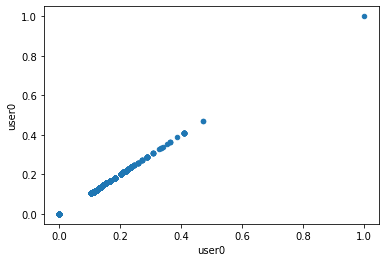

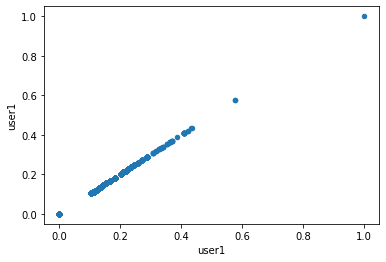

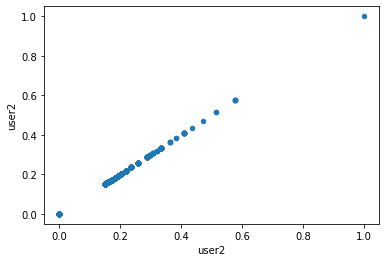

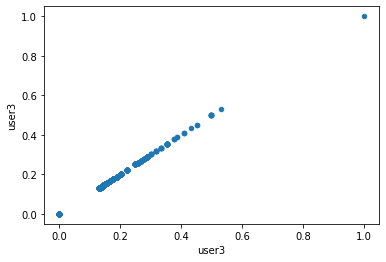

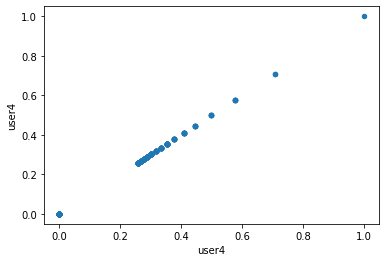

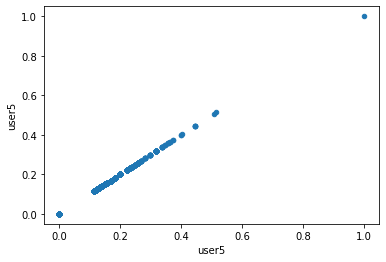

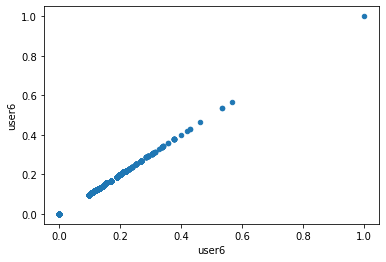

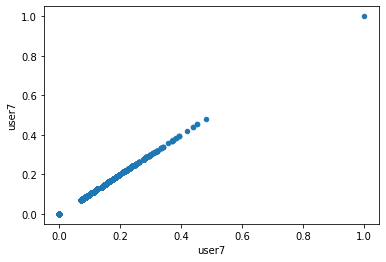

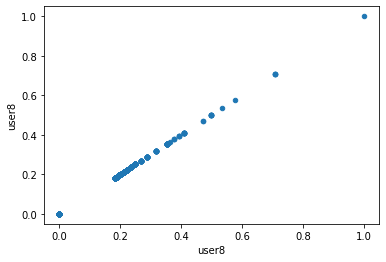

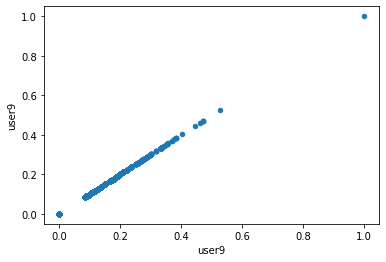

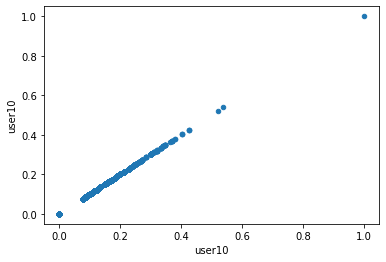

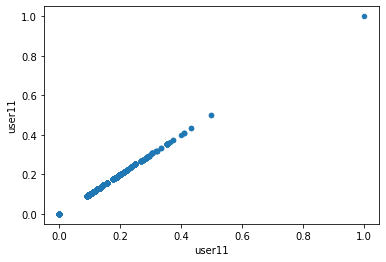

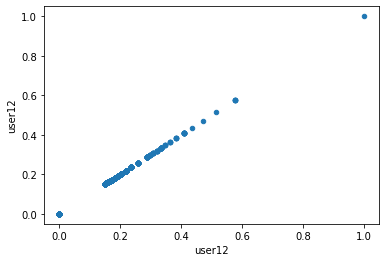

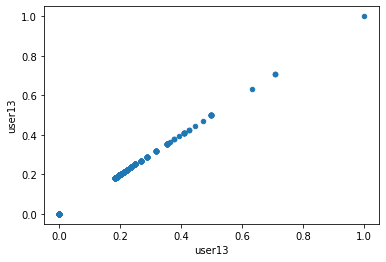

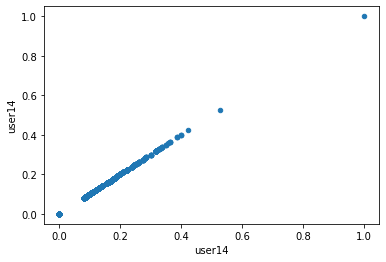

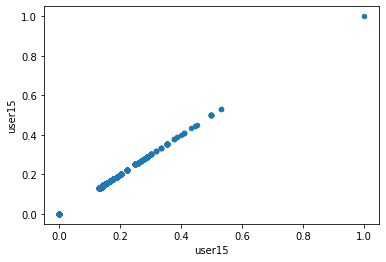

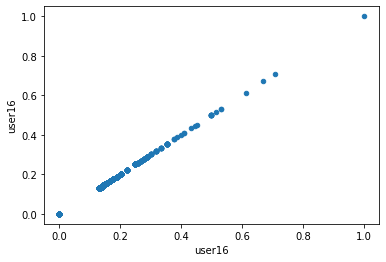

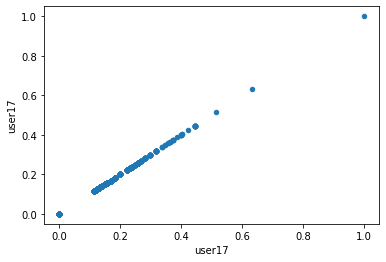

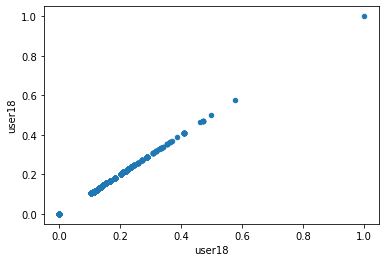

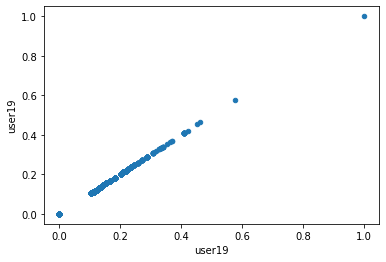

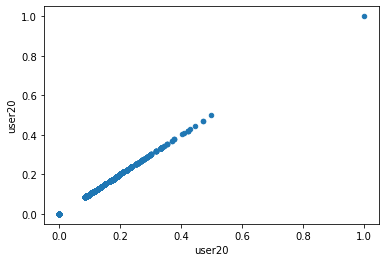

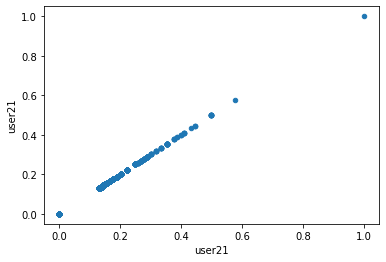

KeyboardInterrupt: Interrupted by user

In [8]:
# Scatter Plot for Users Similarity Analysis.

for column in user_similarity_df.columns:
    scatterplot = user_similarity_df.plot.scatter(x=column,y=column)
    plt.show(scatterplot)
    input()
    
# No special similarity found. Next approach below the next cell.

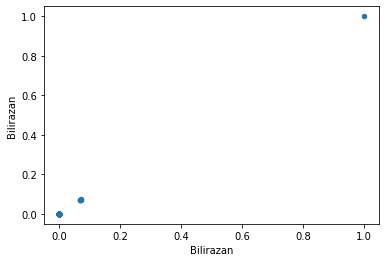

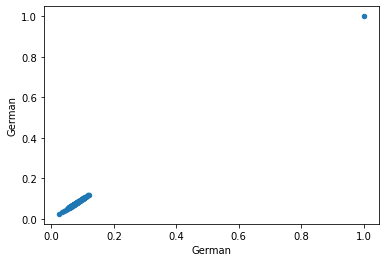

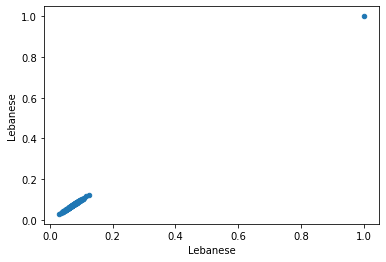

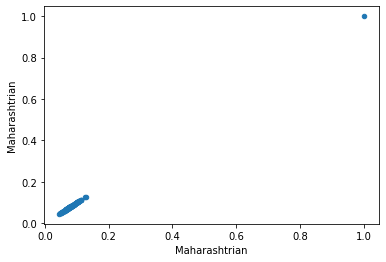

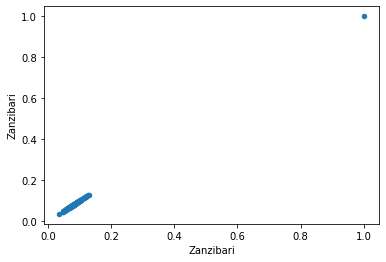

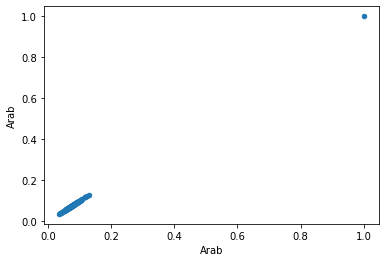

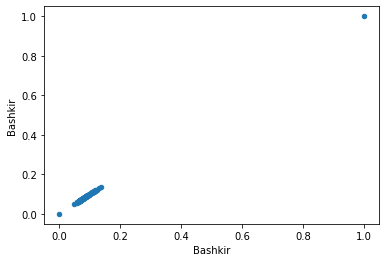

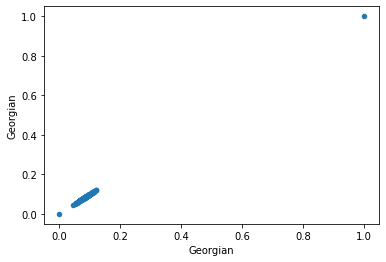

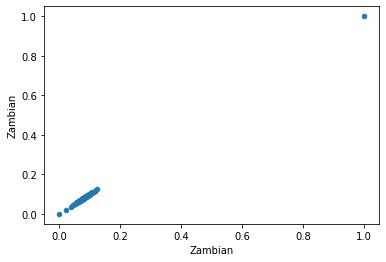

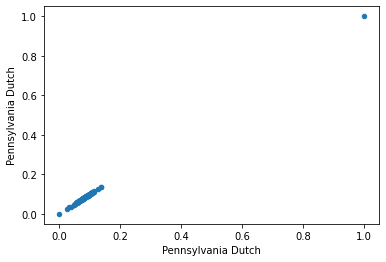

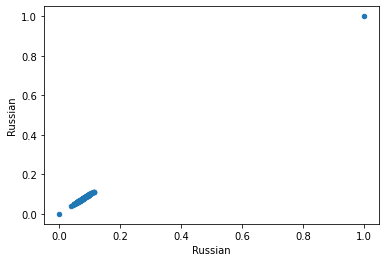

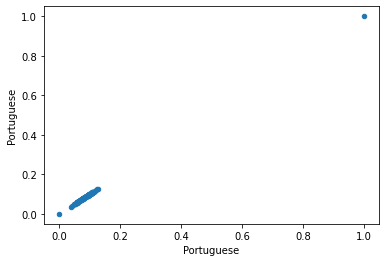

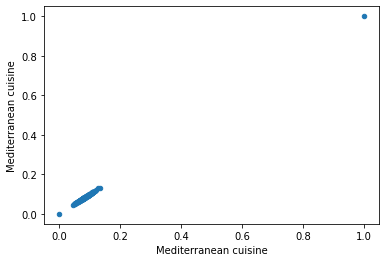

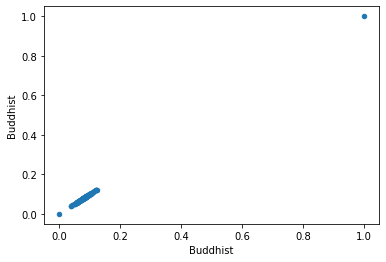

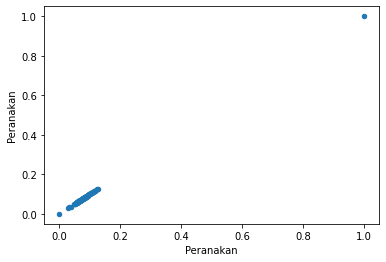

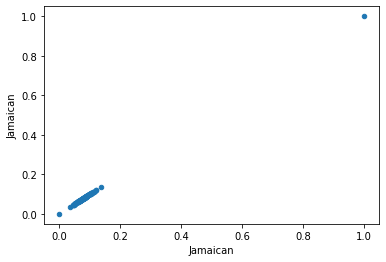

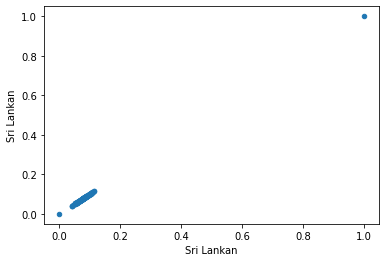

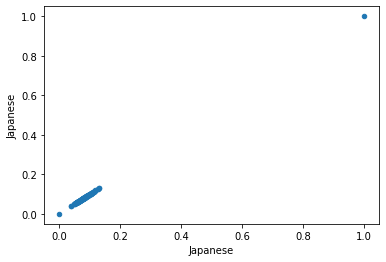

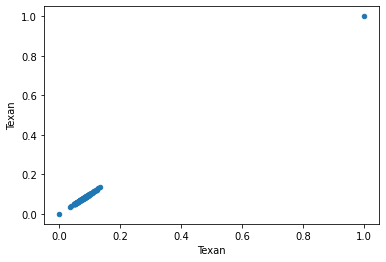

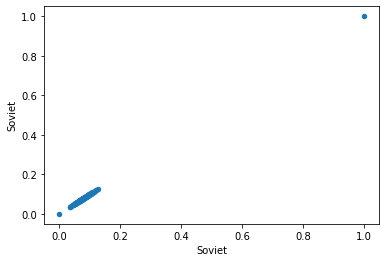

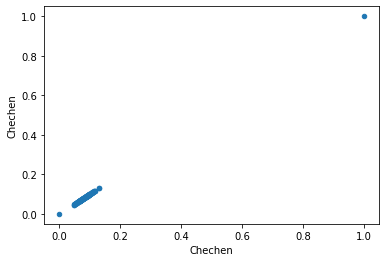

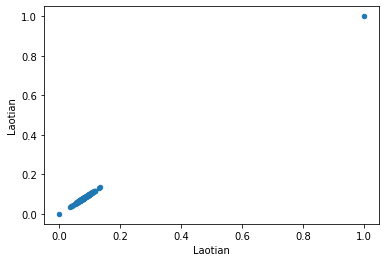

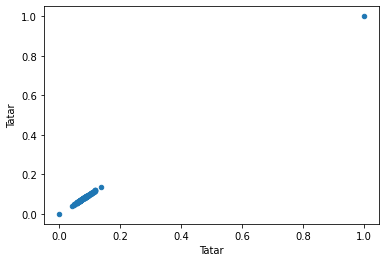

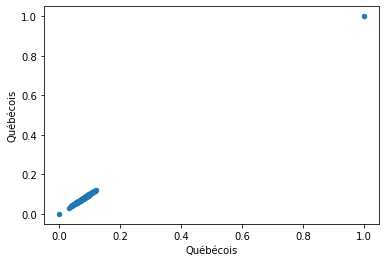

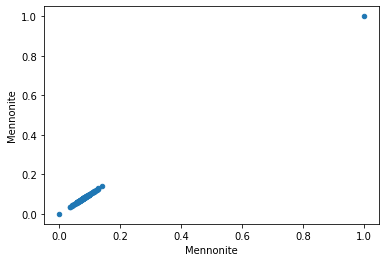

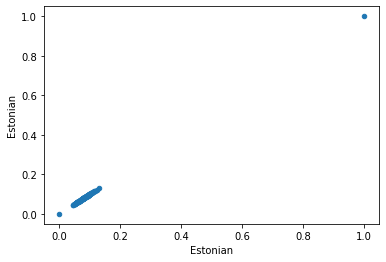

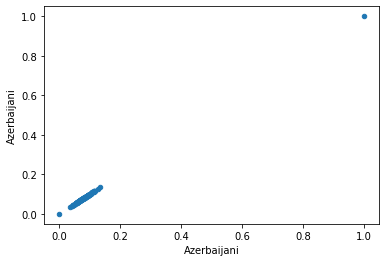

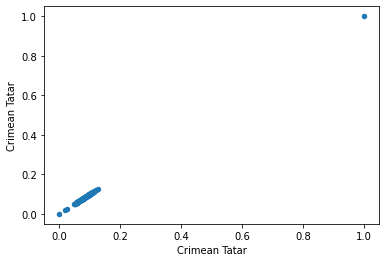

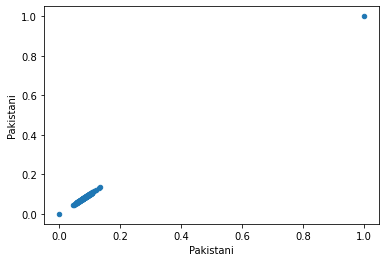

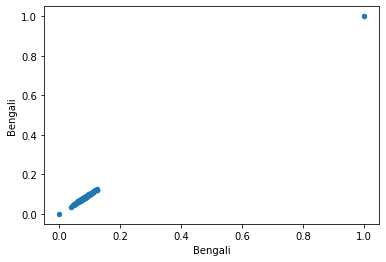

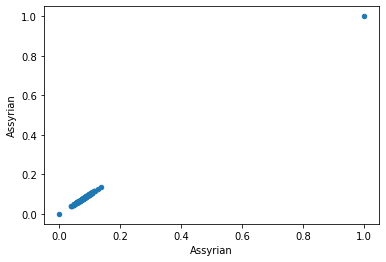

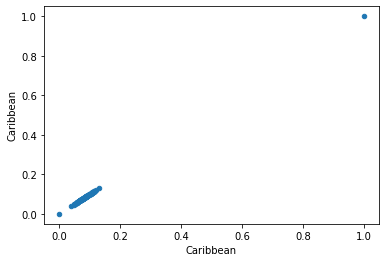

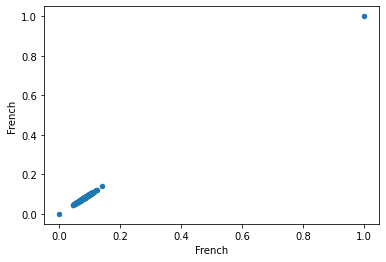

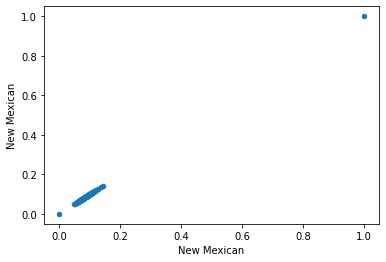

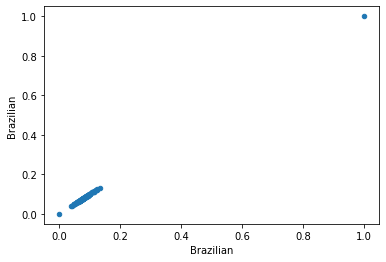

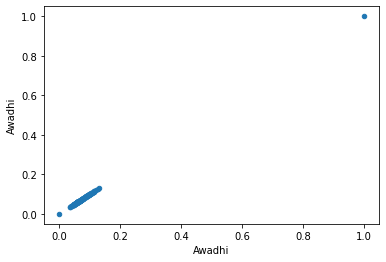

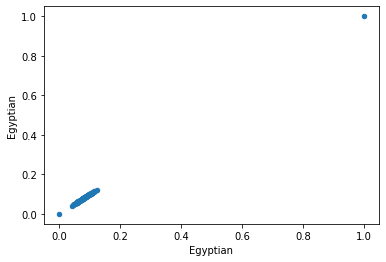

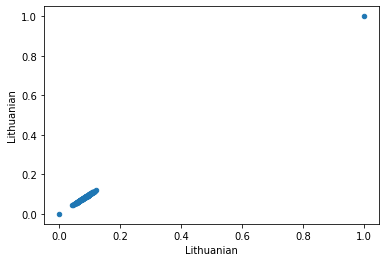

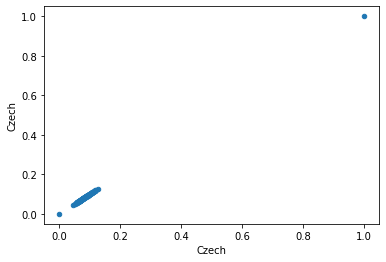

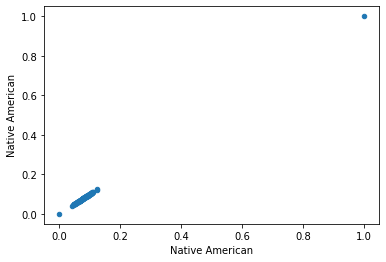

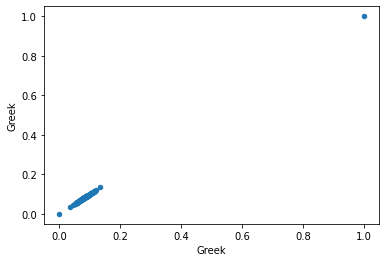

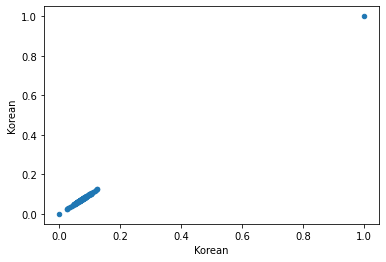

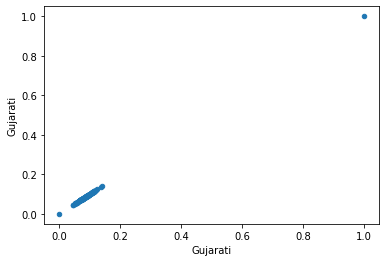

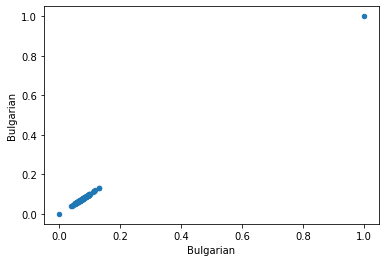

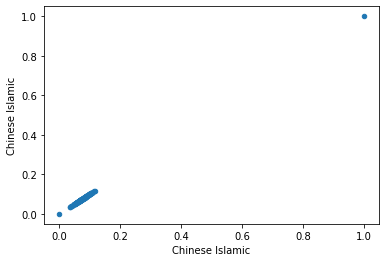

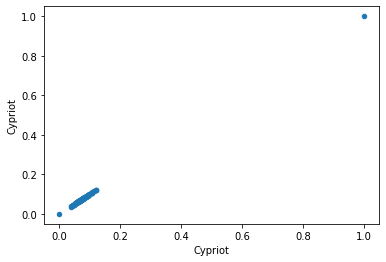

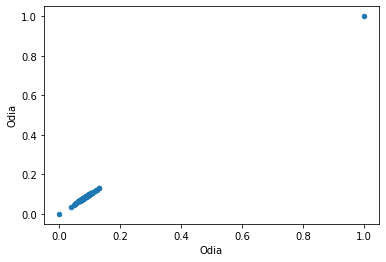

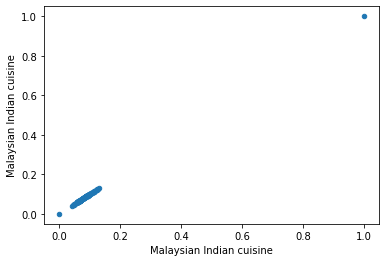

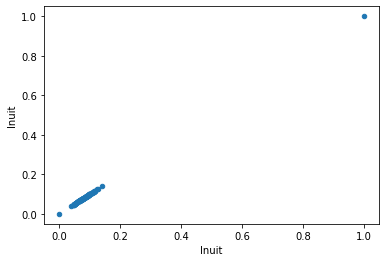

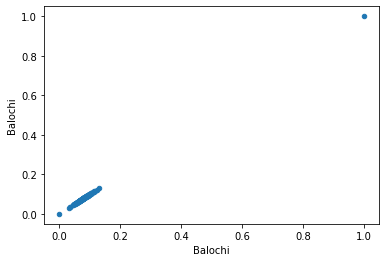

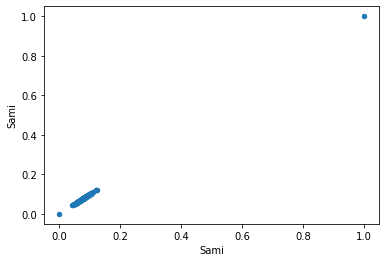

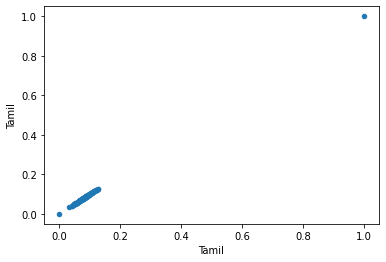

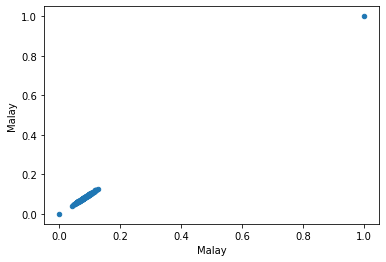

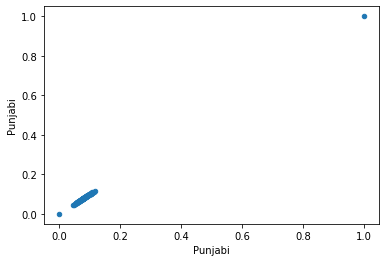

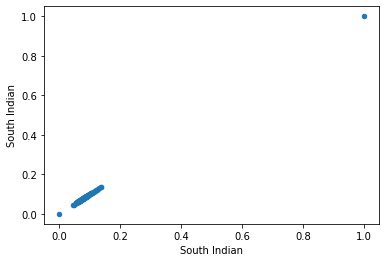

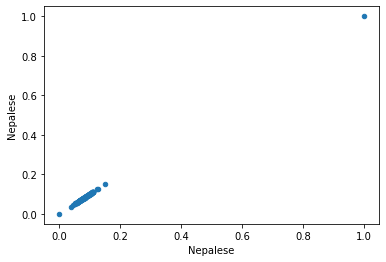

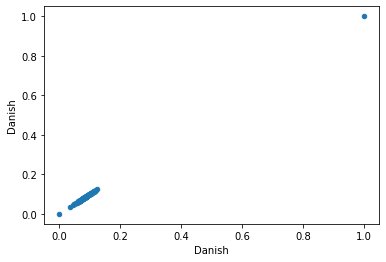

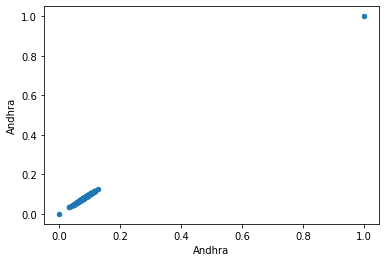

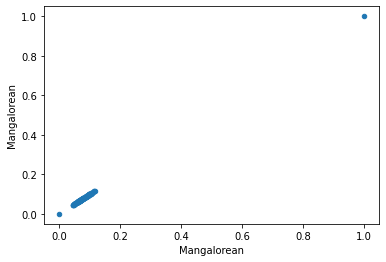

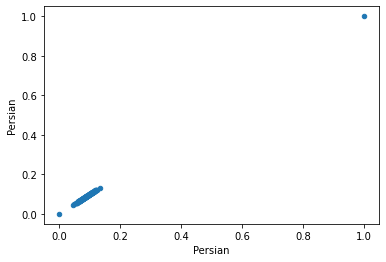

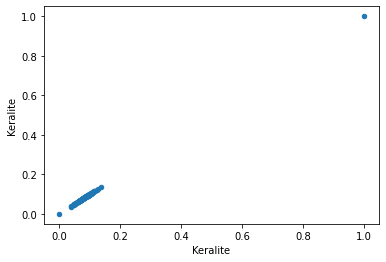

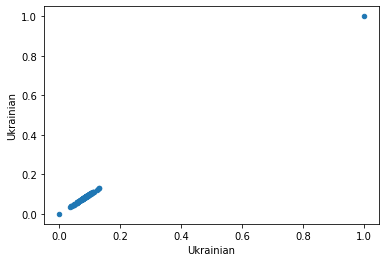

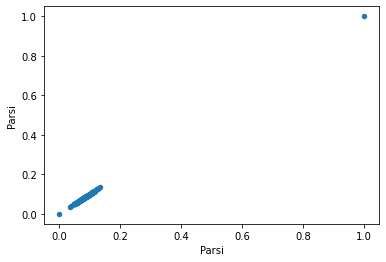

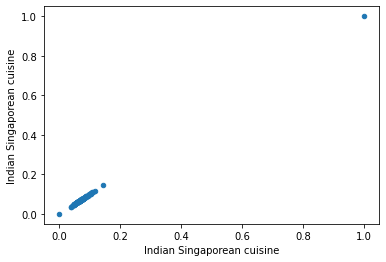

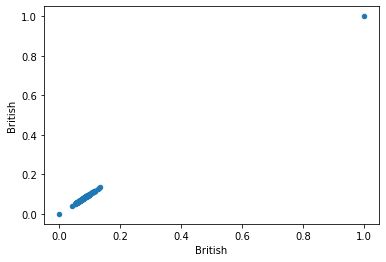

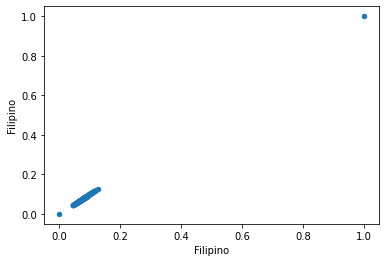

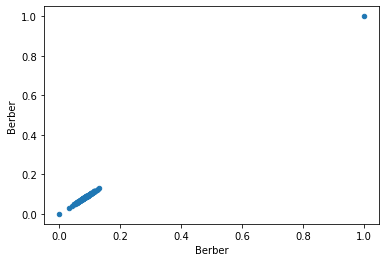

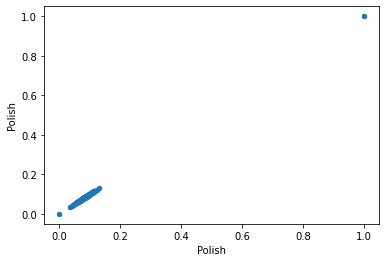

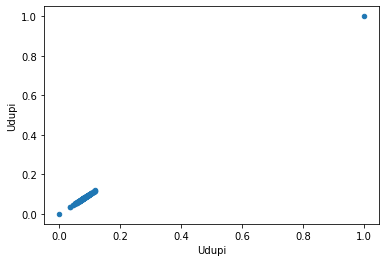

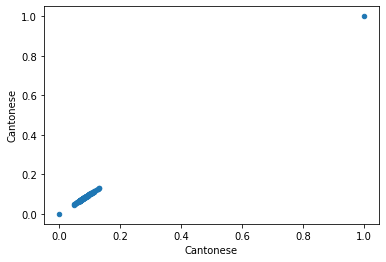

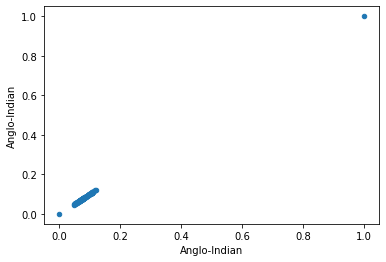

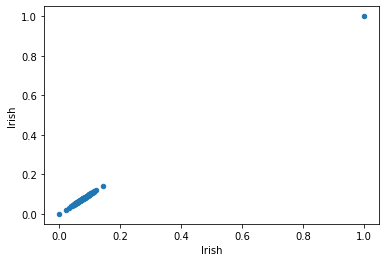

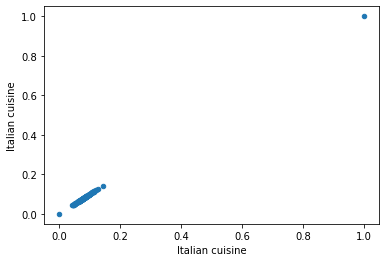

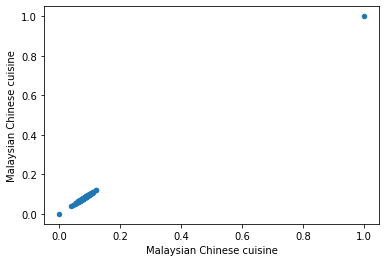

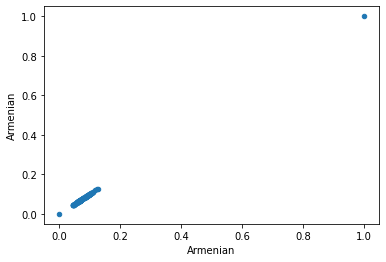

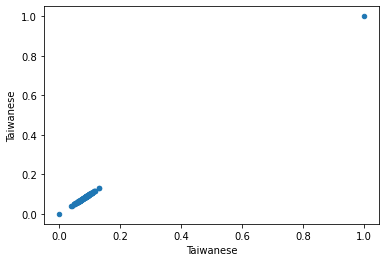

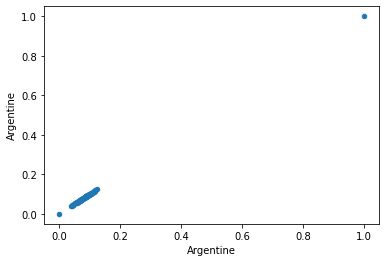

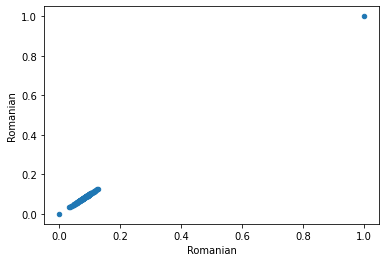

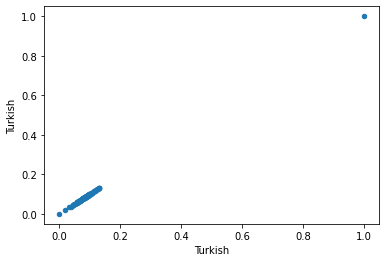

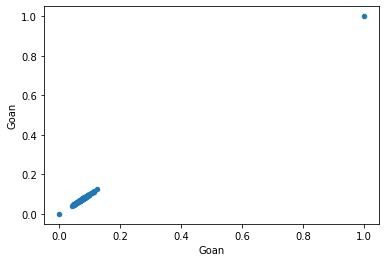

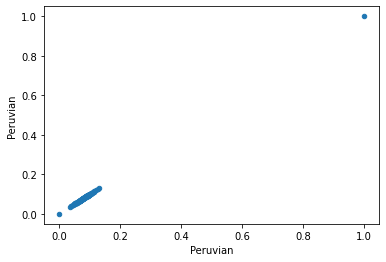

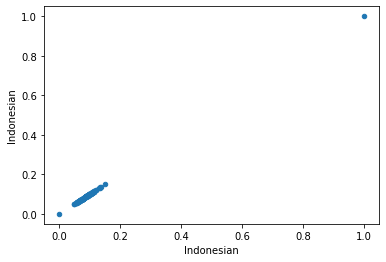

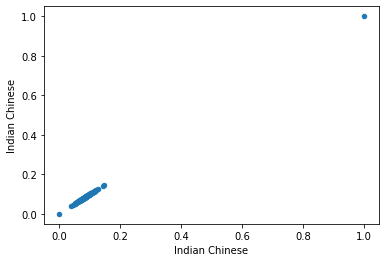

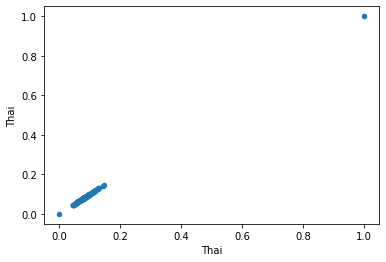

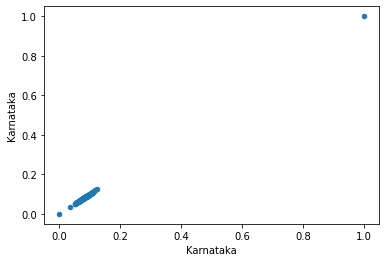

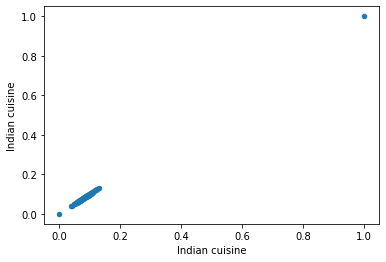

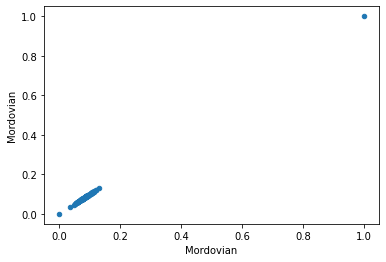

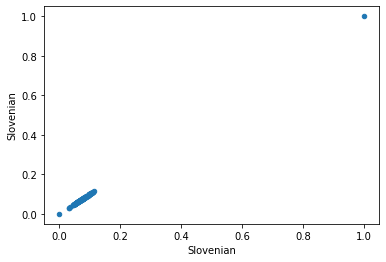

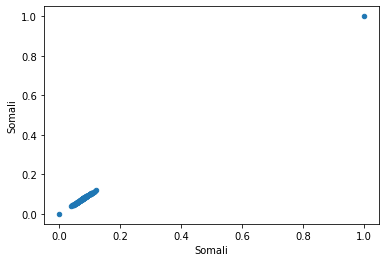

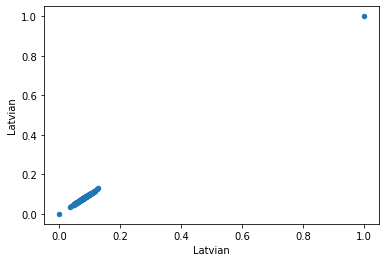

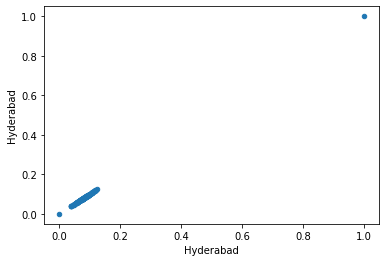

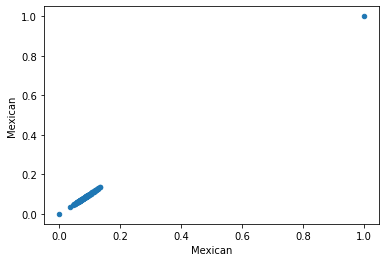

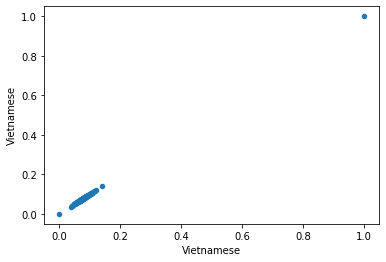

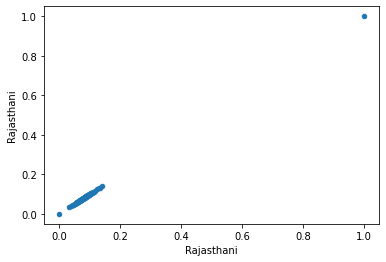

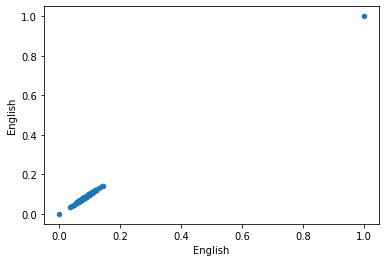

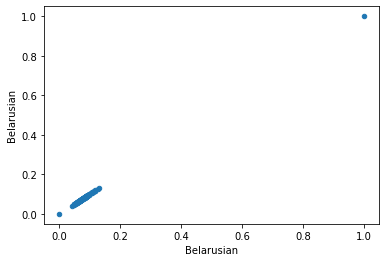

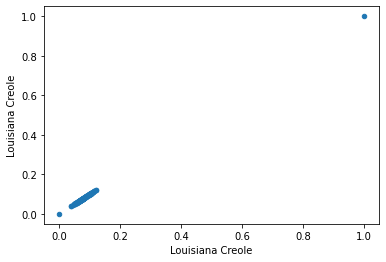

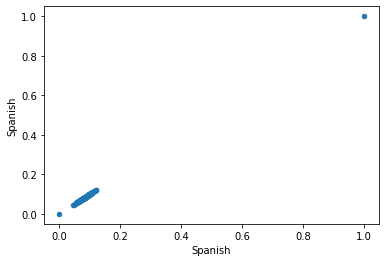

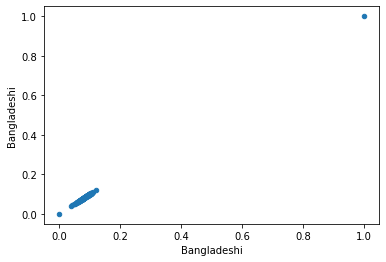

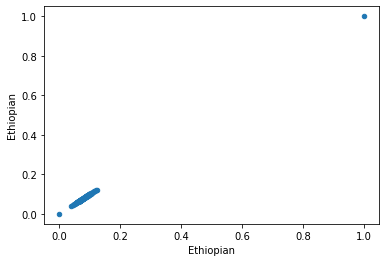

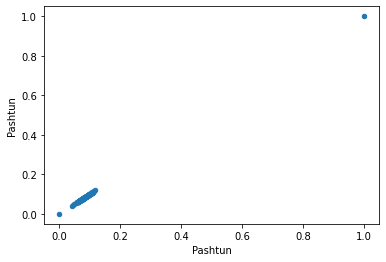

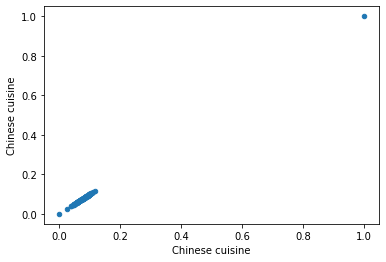

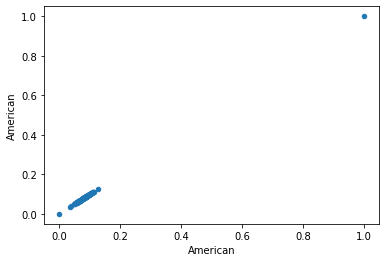

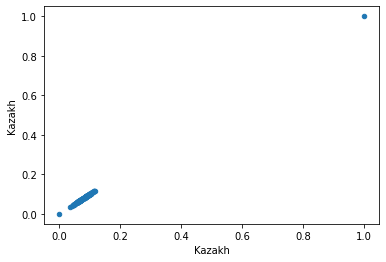

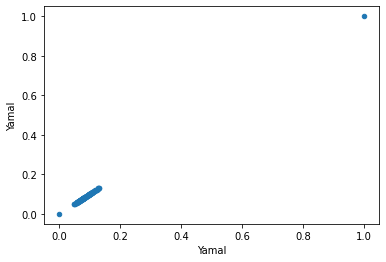

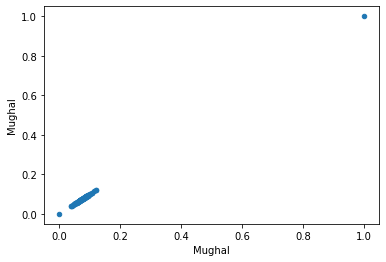

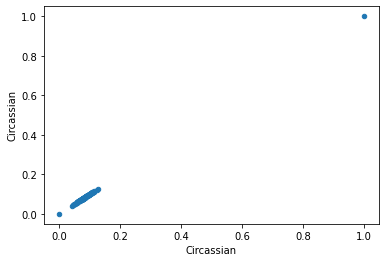

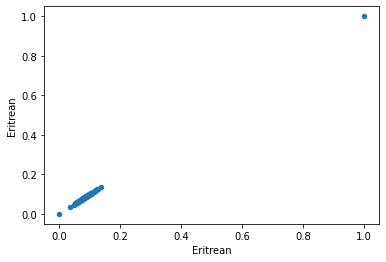

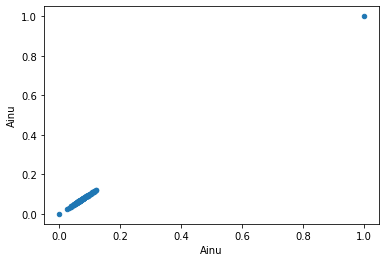

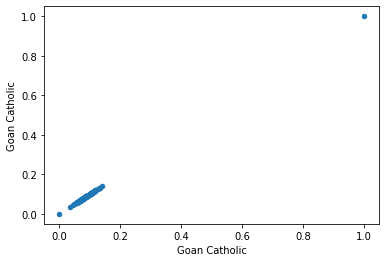

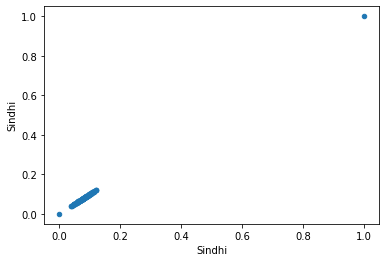

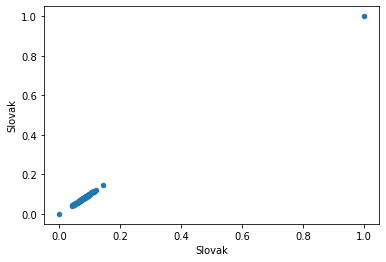

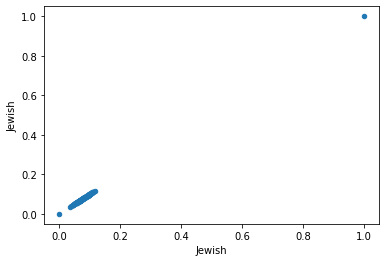

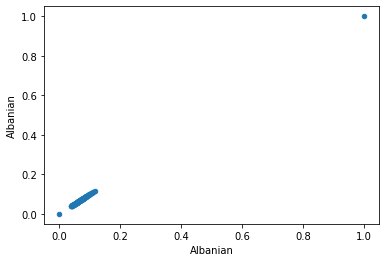

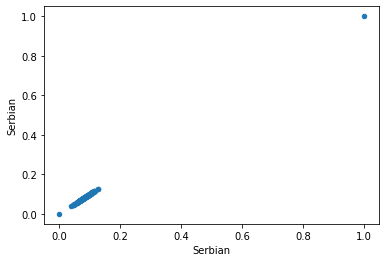

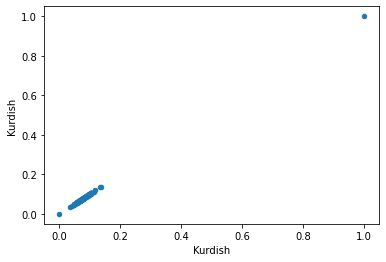

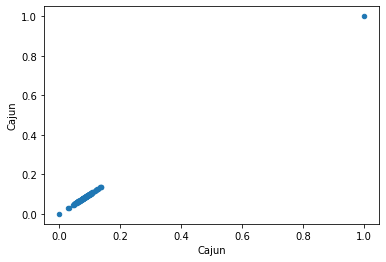

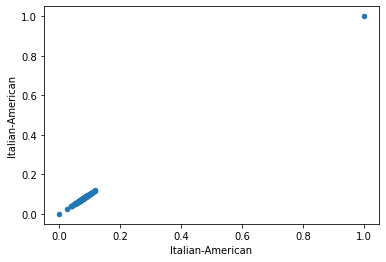

In [9]:
# Scatter Plot for Item Similarity Analysis.

for column in item_similarity_df.columns:
    scatterplot = item_similarity_df.plot.scatter(x=column,y=column)
    plt.show(scatterplot)
    input()
    

# Very low - insignificant similarity found between the cuisines

Text(0, 0.5, 'Euclidean distance')

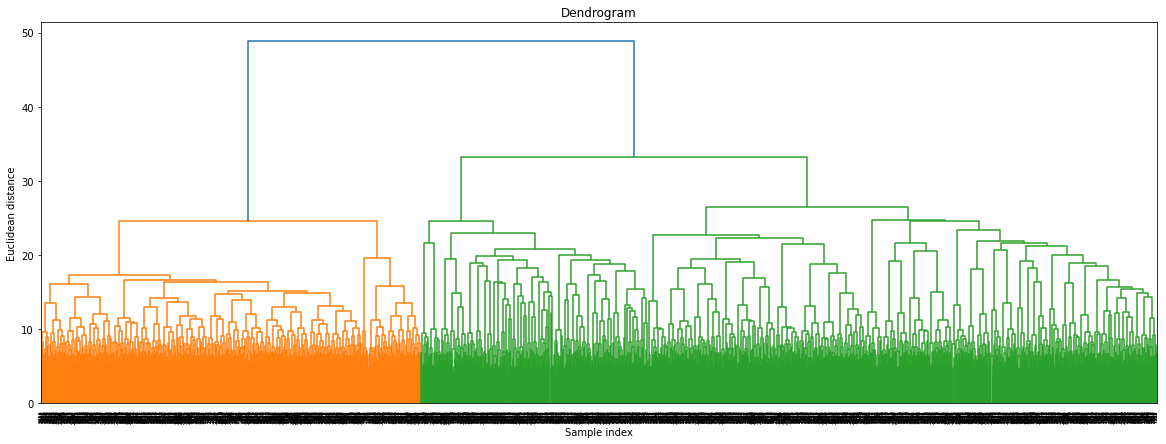

In [10]:
# Making Dendrogram of User Similarity

import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(user_similarity_df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

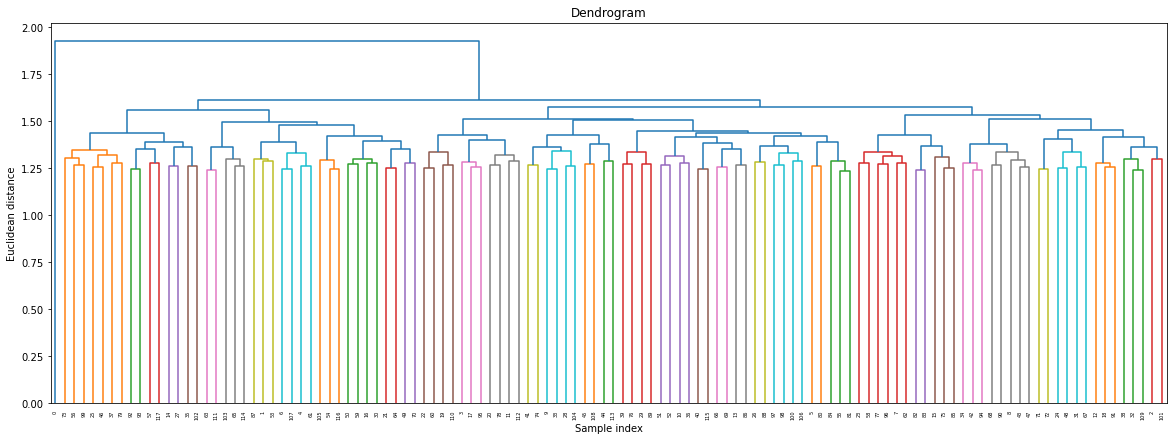

In [11]:
# Making Dendrogram of Item Similarity

import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(item_similarity_df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=6, affinity='euclidean', linkage='ward')

cluster.fit(item_similarity_df)
labels = cluster.labels_
labels

array([3, 2, 1, 0, 2, 0, 2, 5, 1, 0, 0, 0, 1, 0, 4, 5, 2, 0, 1, 0, 0, 2,
       0, 5, 1, 4, 0, 4, 0, 0, 2, 1, 1, 0, 1, 4, 0, 4, 1, 0, 0, 0, 1, 1,
       0, 0, 4, 1, 1, 2, 2, 0, 0, 2, 2, 0, 4, 4, 5, 2, 0, 2, 5, 2, 2, 2,
       0, 1, 1, 0, 2, 1, 1, 4, 0, 5, 0, 5, 0, 4, 0, 0, 5, 5, 0, 5, 0, 2,
       0, 0, 1, 1, 4, 4, 1, 0, 5, 0, 0, 4, 0, 1, 4, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 2, 4], dtype=int64)

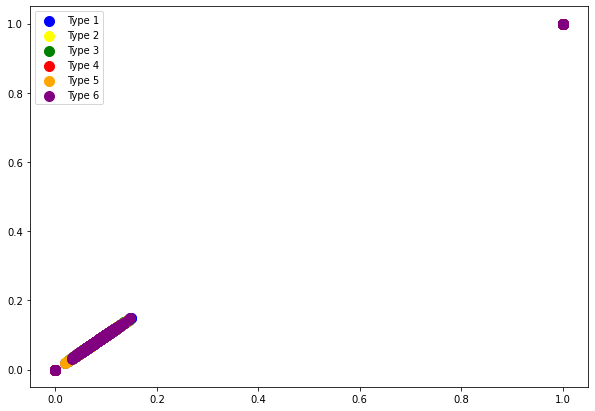

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(item_similarity_df[labels == 0], item_similarity_df[labels == 0], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(item_similarity_df[labels == 1], item_similarity_df[labels == 1], s = 100, c = 'yellow', label = 'Type 2')
plt.scatter(item_similarity_df[labels == 2], item_similarity_df[labels == 2], s = 100, c = 'green', label = 'Type 3')
plt.scatter(item_similarity_df[labels == 3], item_similarity_df[labels == 3], s = 100, c = 'red', label = 'Type 4')
plt.scatter(item_similarity_df[labels == 4], item_similarity_df[labels == 4], s = 100, c = 'orange', label = 'Type 5')
plt.scatter(item_similarity_df[labels == 5], item_similarity_df[labels == 5], s = 100, c = 'purple', label = 'Type 6')
plt.legend()
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(user_similarity_df)
labels = cluster.labels_
labels

array([0, 2, 0, ..., 1, 0, 0], dtype=int64)

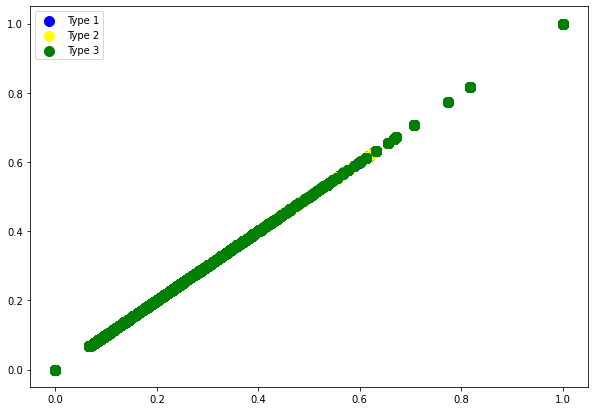

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(user_similarity_df[labels == 0], user_similarity_df[labels == 0], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(user_similarity_df[labels == 1], user_similarity_df[labels == 1], s = 100, c = 'yellow', label = 'Type 2')
plt.scatter(user_similarity_df[labels == 2], user_similarity_df[labels == 2], s = 100, c = 'green', label = 'Type 3')
plt.legend()
plt.show()

In [19]:
def get_similar_cuisine(cuisine_name):
    similar_score = item_similarity_df[cuisine_name]
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score
    
def get_similar_users(user_id):
    similar_score = user_similarity_df[user_id]
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score
#for user1 test    
print(get_similar_users("user5"))
print(get_similar_cuisine("Bilirazan"))

user5       1.000000
user1059    0.516398
user1009    0.507093
user1110    0.447214
user414     0.447214
              ...   
user1167    0.000000
user1168    0.000000
user1169    0.000000
user1172    0.000000
user1500    0.000000
Name: user5, Length: 3000, dtype: float64
Bilirazan           1.000000
Arab                0.072932
Lebanese            0.072548
Zanzibari           0.069338
Maharashtrian       0.068680
                      ...   
Czech               0.000000
Lithuanian          0.000000
Egyptian            0.000000
Awadhi              0.000000
Italian-American    0.000000
Name: Bilirazan, Length: 118, dtype: float64
